In [3]:
# dataset
import numpy as np
from data_set import get_x_y
X, y = get_x_y()
X_b = np.c_[np.ones(X.shape), X]

# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large.

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients
based only on that single instance, so: 
1. makes the algorithm much faster since it has very little data to manipulate at every iteration. 
2. makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm )

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: 

1. So once the algorithm stops, the final parameter values are good, but not optimal.
* Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on averge. Over time it will end up very close to the minimum, but once it gets there it willcontinue to bounce around, never settling down

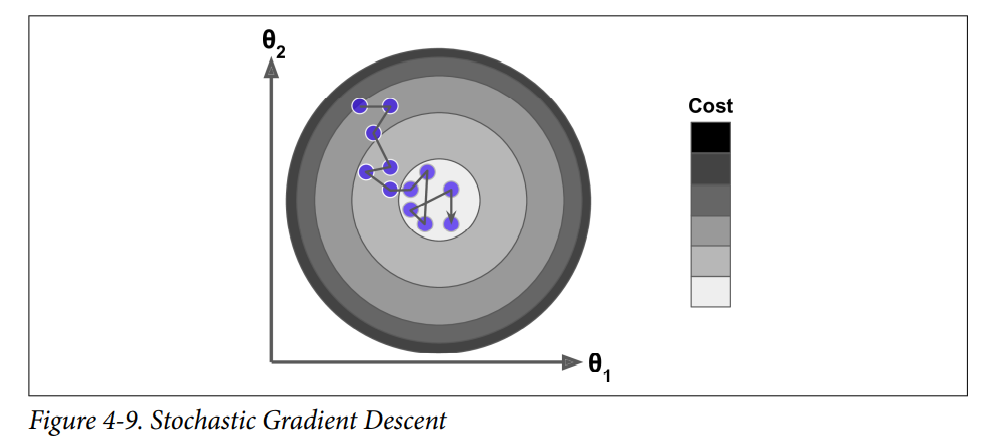


Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum.

1. One solution to this dilemma is to gradually reduce the learning rate. 
2. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down.
3.  The function that determines the learning rate at each iteration is called the learning schedule:
    * If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. 
    *  If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.
    
##### Implementation


In [4]:
epochs = 50
t0, t1 = 5, 50

def learning_rate_schedule(t):
    return t0 / (t + t1)

In [5]:
m = 1000
eta = 0.1
theta = np.random.rand(2, 1)
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2/m * (X_b.T.dot(X_b.dot(theta) - y))
        theta -= eta*gradients
theta

array([[4.24210155],
       [2.82887184]])

In [6]:
m = 10000
eta = 0.1
theta = np.random.rand(2, 1)
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2/m * (X_b.T.dot(X_b.dot(theta) - y))
        theta -= eta*gradients
theta

array([[4.24210155],
       [2.82887184]])

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_


(array([4.29010534]), array([2.89030201]))

there's no different between 50, 1000, 10000 epochs, this example show you how Stochastic converge